In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.image import extract_patches 
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.applications import ResNet50


Using TensorFlow backend.


In [2]:
def processing_pipeline(data, patch_size, painter_id, shuffle=True):
    """
    Function that converts data to x and y arrays, where x is an array of patches 
    and y is an array of corresponding labels.
    
    Parameters
    ----------
    data: loaded painting data
    patch_size: integer
        The length of the patch square side
    painter_id: integer
        painter_i indicates artist #i+1, like painter_0 means artist #1
    shuffle: boolean
        Whether or not to shuffle the elements in x and y
        
    Returns
    ----------
    x, y: x is an array of patches, y is an array of the corresponding labels that indicate 
    painter id
    """
    # normalize the loaded data to be between 0 and 1
    mms = MinMaxScaler()
    data_scaled = mms.fit_transform(data)
    
    # get patches
    patches = extract_patches(data_scaled, patch_shape = patch_size, extraction_step = patch_size)
    patches_reshaped = patches.reshape(-1, patch_size, patch_size)
    
    # label patches based off of the painter id
    labels = []
    def get_label(painter_id, patch_arr):
        labels.clear()
        labels.append(painter_id * patch_arr)
        return labels

    p_id = painter_id # change painter id here
    # note that the artist with painter id #i is actually artist #i+1
    list_len = np.ones(len(patches_reshaped))
    y_list = get_label(p_id, list_len)
    y_list = np.reshape(y_list, (len(patches_reshaped),1))
    
    # shuffle data
    if shuffle:
        shuffle_idx = np.arange(len(patches_reshaped))
        np.random.shuffle(shuffle_idx)
        x = patches_reshaped[shuffle_idx]
        y = y_list[shuffle_idx]
   
    return x, y  # use this when shuffle=True
    #return patches_reshaped, y_list  # use this when shuffle=False
    

In [3]:
size_update = 220 # updata patch_size here

# load data and convert data to a list arrays of patches (x) and corresponding labels (y)
# painter #1 with painter_id 0
p1_a = np.fromfile('/home/ml/h_data_s/height1as', dtype=np.float64)
p1_a = p1_a.reshape(3001,2401)
p1_b = np.fromfile('/home/ml/h_data_s/height1bs', dtype=np.float64)
p1_b = p1_b.reshape(3001,2401)
p1_c = np.fromfile('/home/ml/h_data_s/height1cs', dtype=np.float64)
p1_c = p1_c.reshape(3001,2401)
p1a_x, p1a_y = processing_pipeline(p1_a, patch_size = size_update, painter_id=0)
p1b_x, p1b_y = processing_pipeline(p1_b, patch_size = size_update, painter_id=0)
p1c_x, p1c_y = processing_pipeline(p1_c, patch_size = size_update, painter_id=0)

# painter #2 with painter_id 1
p2_a = np.fromfile('/home/ml/h_data_s/height2as', dtype=np.float64)
p2_a = p2_a.reshape(3001,2401)
p2_b = np.fromfile('/home/ml/h_data_s/height2bs', dtype=np.float64)
p2_b = p2_b.reshape(3001,2401)
p2_c = np.fromfile('/home/ml/h_data_s/height2cs', dtype=np.float64)
p2_c = p2_c.reshape(3001,2401)
p2a_x, p2a_y = processing_pipeline(p2_a, patch_size = size_update, painter_id=1)
p2b_x, p2b_y = processing_pipeline(p2_b, patch_size = size_update, painter_id=1)
p2c_x, p2c_y = processing_pipeline(p2_c, patch_size = size_update, painter_id=1)

# painter #3 with painter_id 2
p3_a = np.fromfile('/home/ml/h_data_s/height3as', dtype=np.float64)
p3_a = p3_a.reshape(3001,2401)
p3_b = np.fromfile('/home/ml/h_data_s/height3bs', dtype=np.float64)
p3_b = p3_b.reshape(3001,2401)
p3_c = np.fromfile('/home/ml/h_data_s/height3cs', dtype=np.float64)
p3_c = p3_c.reshape(3001,2401)
p3a_x, p3a_y = processing_pipeline(p3_a, patch_size = size_update, painter_id=2)
p3b_x, p3b_y = processing_pipeline(p3_b, patch_size = size_update, painter_id=2)
p3c_x, p3c_y = processing_pipeline(p3_c, patch_size = size_update, painter_id=2)

# painter #4 with painter_id 3
p4_a = np.fromfile('/home/ml/h_data_s/height4as', dtype=np.float64)
p4_a = p4_a.reshape(3001,2401)
p4_b = np.fromfile('/home/ml/h_data_s/height4bs', dtype=np.float64)
p4_b = p4_b.reshape(3001,2401)
p4_c = np.fromfile('/home/ml/h_data_s/height4cs', dtype=np.float64)
p4_c = p4_c.reshape(3001,2401)
p4a_x, p4a_y = processing_pipeline(p4_a, patch_size = size_update, painter_id=3)
p4b_x, p4b_y = processing_pipeline(p4_b, patch_size = size_update, painter_id=3)
p4c_x, p4c_y = processing_pipeline(p4_c, patch_size = size_update, painter_id=3)

In [4]:
# getting the whole dataset X and its corresponding label Y
X = np.concatenate((p1a_x, p1b_x, p1c_x, p2a_x, p2b_x, p2c_x, p3a_x, p3b_x, p3c_x, p4a_x, p4b_x, p4c_x))
Y = np.concatenate((p1a_y, p1b_y, p1c_y, p2a_y, p2b_y, p2c_y, p3a_y, p3b_y, p3c_y, p4a_y, p4b_y, p4c_y))

In [5]:
# train-test split, 25% of the whole dataset is test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# reshaping datasets for Keras
X_train = X_train.reshape(*X_train.shape, 1)
# splitting train and validation sets
x_train = X_train[len(X_test):len(X_train), :]
x_validation = X_train[0:len(X_test), :] # validation set has the same length as the test set
x_test = X_test.reshape(*X_test.shape, 1)
# one-hot encode y
Y_train = to_categorical(Y_train, num_classes=None)
# splitting train and validation sets
y_train = Y_train[len(X_test):len(X_train), :]
y_validation = Y_train[0:len(X_test), :]
y_test = to_categorical(Y_test, num_classes=None)

# before splitting train and validation sets, X and Y
# after splitting train and validation sets, x and y 

In [6]:
x_train[1]

array([[[0.20437728],
        [0.19572512],
        [0.20007647],
        ...,
        [0.04964842],
        [0.04041346],
        [0.04135758]],

       [[0.19240163],
        [0.18530604],
        [0.19842064],
        ...,
        [0.04932541],
        [0.03621575],
        [0.04422711]],

       [[0.21277684],
        [0.193927  ],
        [0.21488069],
        ...,
        [0.05364317],
        [0.03506326],
        [0.04584006]],

       ...,

       [[0.18303445],
        [0.17058632],
        [0.16611497],
        ...,
        [0.04643639],
        [0.03703795],
        [0.04401447]],

       [[0.1774736 ],
        [0.1697062 ],
        [0.17788129],
        ...,
        [0.05161571],
        [0.03835324],
        [0.04298455]],

       [[0.1950203 ],
        [0.18761162],
        [0.17825768],
        ...,
        [0.05140543],
        [0.03675543],
        [0.04416519]]])

In [7]:
y_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(220, 220, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(4, activation='softmax'))
          
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 218, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 32)      9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 104, 104, 64)      36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 128)      

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1, 
          validation_data=(x_validation, y_validation))


Train on 780 samples, validate on 390 samples
Epoch 1/20
780/780 [==============================] - 4s 6ms/step - loss: 1.3569 - accuracy: 0.3013 - val_loss: 1.2498 - val_accuracy: 0.3410
Epoch 2/20
780/780 [==============================] - 1s 2ms/step - loss: 1.2306 - accuracy: 0.4064 - val_loss: 1.1762 - val_accuracy: 0.4513
Epoch 3/20
780/780 [==============================] - 1s 2ms/step - loss: 1.1624 - accuracy: 0.4603 - val_loss: 1.1818 - val_accuracy: 0.4744
Epoch 4/20
780/780 [==============================] - 1s 2ms/step - loss: 1.1492 - accuracy: 0.4359 - val_loss: 1.1558 - val_accuracy: 0.4385
Epoch 5/20
780/780 [==============================] - 1s 2ms/step - loss: 1.1239 - accuracy: 0.4500 - val_loss: 1.1574 - val_accuracy: 0.4897
Epoch 6/20
780/780 [==============================] - 1s 2ms/step - loss: 1.1157 - accuracy: 0.4885 - val_loss: 1.1017 - val_accuracy: 0.5154
Epoch 7/20
780/780 [==============================] - 1s 2ms/step - loss: 1.0573 - accuracy: 0.5359 -

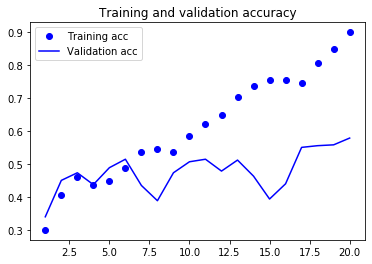

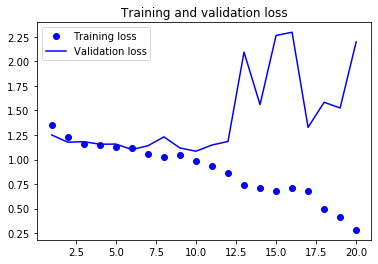

In [11]:
# plotting the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
p1_a

In [ ]:
to_categorical(p1a_y, num_classes=4)

In [ ]:
y_train

In [ ]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, AveragePooling2D, Conv2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(220, 220, 1), name='L01', activation='relu'))
model.add(Conv2D(32, (3, 3), name='L02', activation='relu'))

model.add(AveragePooling2D(pool_size=(2, 2), name='L03'))
model.add(Conv2D(64, (3, 3), name='L04', activation='relu'))
model.add(Conv2D(64, (3, 3), name='L05', activation='relu'))
    
model.add(AveragePooling2D(pool_size=(2, 2), name='L06'))
    
model.add(Conv2D(128, (3, 3), name='L07', activation='relu'))
model.add(Conv2D(128, (3, 3), name='L08', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), name='L09'))

model.add(Conv2D(128, (3, 3), name='L10', activation='relu'))
model.add(Conv2D(128, (3, 3), name='L11', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), name='L12'))
    
model.add(Conv2D(128, (3, 3), name='L13', activation='relu'))
model.add(Conv2D(128, (3, 3), name='L14', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), name='L15'))
    
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(256, name='L16', activation='relu'))
model.add(Dense(256, name='L17', activation='relu'))

model.add(Dense(4, name='L18', activation='softmax'))
model.compile(optimizer=Adam(lr=1e-4, beta_1=0.9, beta_2=0.999), 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
y_train

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, 
          validation_data=(x_validation, y_validation))

In [ ]:
# use pre-trained ResNet-50
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
conv_base.summary()